# Generate correction profiles for denoised

by Pu Zheng

2019.06.18

In [74]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

print(os.getpid())

10144


In [75]:
reload(ia.get_img_info)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.alignment_tools)
reload(ia.correction_tools.illumination)

<module 'ImageAnalysis3.correction_tools.illumination' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\illumination.py'>

# Data folder

In [76]:
# master folder for this dataset:
master_folder = r'\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++'
# correction folder
correction_folder=os.path.join(master_folder, 'Corrections_3color')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

# Illumination_correction

In [5]:
#master_folder = r'\\10.245.74.116\Chromatin_NAS_4\20191218_CTP05-chr21_HCT116_6hauxin'
#correction_folder =os.path.join(master_folder, 'Corrections')
folders, fovs = get_img_info.get_folders(master_folder, 'H')
folders = [_fd for _fd in folders if ('Cy' in _fd and '3color' in _fd)]
print(folders)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 81
- Number of field of views: 72
['\\\\10.245.74.158\\Chromatin_NAS_6\\20201012-mouse_proB_IgH++\\H74R24Cy7_3color', '\\\\10.245.74.158\\Chromatin_NAS_6\\20201012-mouse_proB_IgH++\\H75R24Cy5_3color', '\\\\10.245.74.158\\Chromatin_NAS_6\\20201012-mouse_proB_IgH++\\H76R24Cy3_3color']


In [6]:
# shared parameters
single_im_size = np.array([30,2048,2048])
all_colors = ['750','647','561','488']
# image and threads
num_images = 60
num_threads = 30

# Illumination correction

-- directly load:[] illumination profiles for files
-- start calculating ['750', '647', '561', '488'] illumination profiles
-- 60 among 72 dax files will be loaded in data_folder: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H74R24Cy7_3color
++ start multi-processing illumination profile calculateion with 30 threads for 60 images in 787.19s.
-- saving updated profiles
--- saving 750 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections_3color\illumination_correction_750_2048x2048.npy
--- saving 647 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections_3color\illumination_correction_647_2048x2048.npy
--- saving 561 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections_3color\illumination_correction_561_2048x2048.npy
--- saving 488 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections_3color\illumination_correction_488_2048x2048.npy


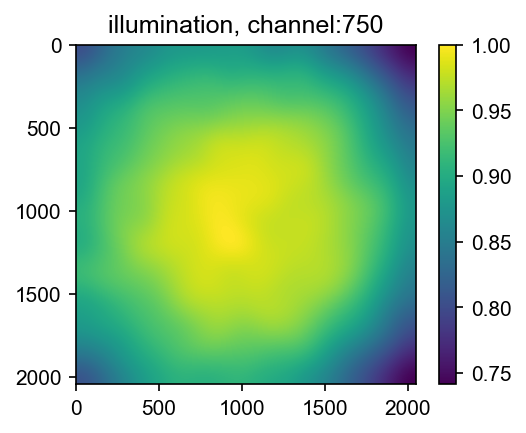

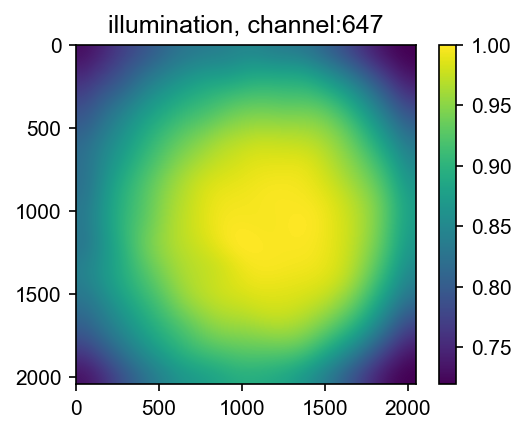

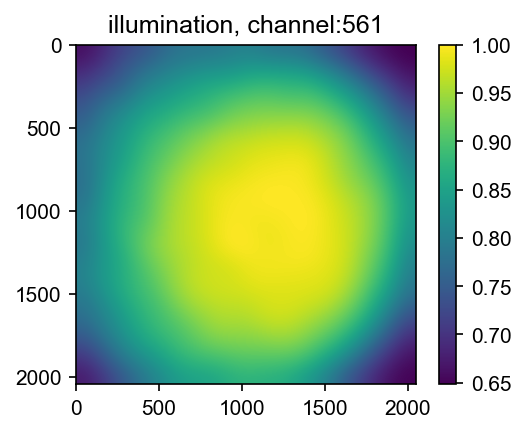

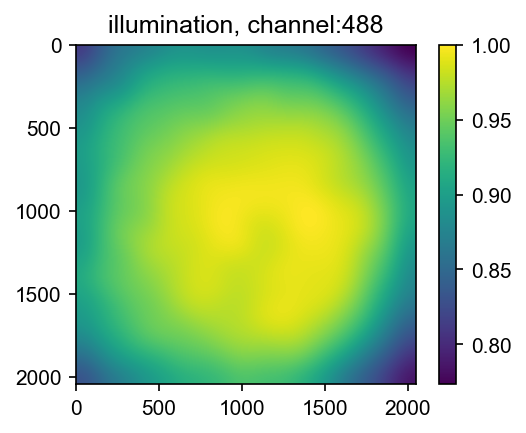

-- finish generating illumination profiles, time:820.48s


In [7]:
%matplotlib inline
reload(ia.correction_tools.illumination)

dapi_folder = folders[0]
illumination_pfs = correction_tools.illumination.Generate_illumination_correction(
                        dapi_folder, 
                        all_colors,
                        all_channels=all_colors,
                        num_threads=num_threads,
                        num_images=num_images,
                        single_im_size=single_im_size,
                        correction_folder=correction_folder,
                        gaussian_filter_size=60,
                        save=True, save_folder=correction_folder,
                        overwrite=True,
                        )

# Chromatic Abbrevation

## chromatic for 750

In [8]:
cc_folder = folders[0]
ref_folder = folders[1]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H74R24Cy7_3color \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5_3color


-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 60 images in 30 threads in 2108.674s.
++ fitting polynomial orders: [1 1 1]
-- constants: [ 1.65878816e-01  1.63867348e-02 -5.87812845e-06  3.18710456e-05] with rsquare=0.4130850733762469
-- constants: [-1.84784377e-02 -6.96839023e-04 -1.82806865e-03  1.35505983e-05] with rsquare=0.9704129875004486
-- constants: [-1.20289990e-01 -1.03844775e-03 -7.67061564e-06 -1.82545455e-03] with rsquare=0.9733144961451073
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections_3color


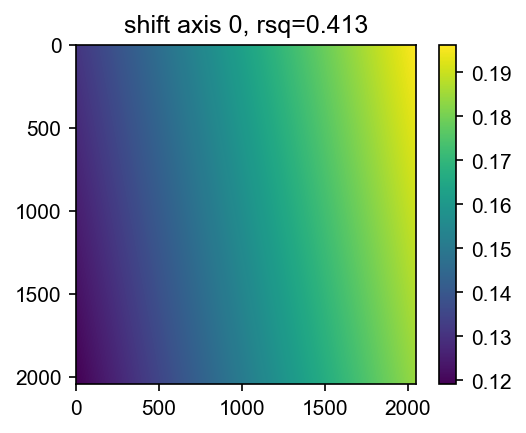

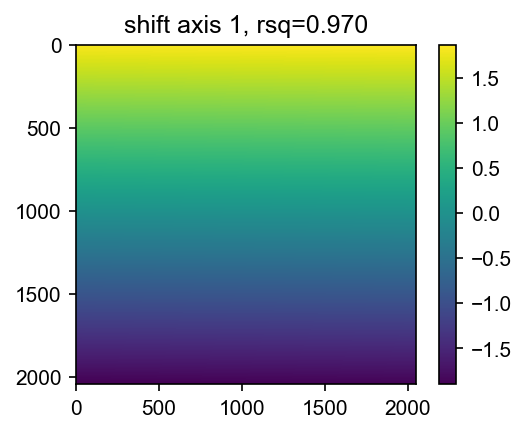

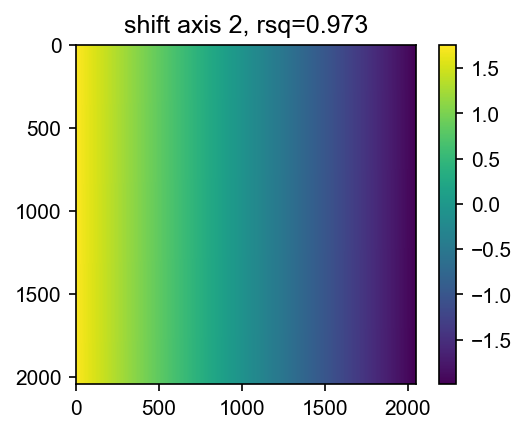

In [9]:
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '750',
                                    num_images=num_images, num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_profile=True,
                                    overwrite_temp=True, )

### check chromatic abbrevation, 750-647

In [10]:
test_fov_id = 5
ref_filename = os.path.join(ref_folder, fovs[test_fov_id])
cc_filename = os.path.join(cc_folder, fovs[test_fov_id])

# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [750], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    corr_channels=['750', '647'],
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [750], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     corr_channels=['750', '647'],
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5_3color\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5_3color\Conv_zscan_05.dax  in 20.185s
-- removing hot pixels for channels:['647', '488'] in 19.538s
-- illumination correction for channels: 647, 488, in 3.766s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 45.211s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H74R24Cy7_3color\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_30_2048_2048_co

<IPython.core.display.Javascript object>


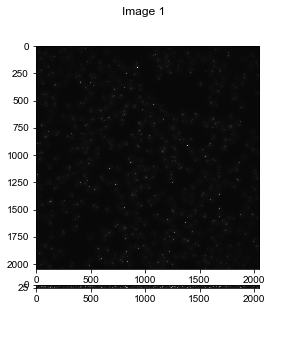

<IPython.core.display.Javascript object>


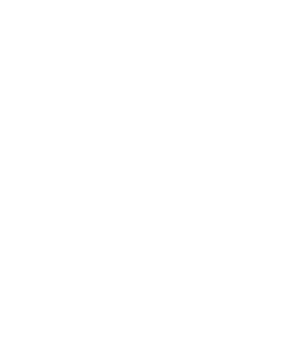

In [11]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [12]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function(_coords, _drift=array([-0.13, -2.07,  0.98]), _consts=[array([ 1.65878816e-01,  1.63867348e-02, -5.87812845e-06,  3.18710456e-05]), array([-1.84784377e-02, -6.96839023e-04, -1.82806865e-03,  1.35505983e-05]), array([-1.20289990e-01, -1.03844775e-03, -7.67061564e-06, -1.82545455e-03])], _fitting_orders=array([1, 1, 1]), _ref_center=array([  15., 1024., 1024.]))>

In [13]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '750', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '750', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:750, 500 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:199: RuntimeWarning: overflow encountered in exp
  return 2./(1+np.exp(t_))-1.
E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:248: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


normalize total background:225.00, 500 fitted in 53.814s.
-- start fitting spots in channel:750, 500 seeded, normalize total background:225.00, 500 fitted in 54.708s.
-- start fitting spots in channel:647, 500 seeded, normalize total background:515.00, 500 fitted in 54.321s.


<IPython.core.display.Javascript object>


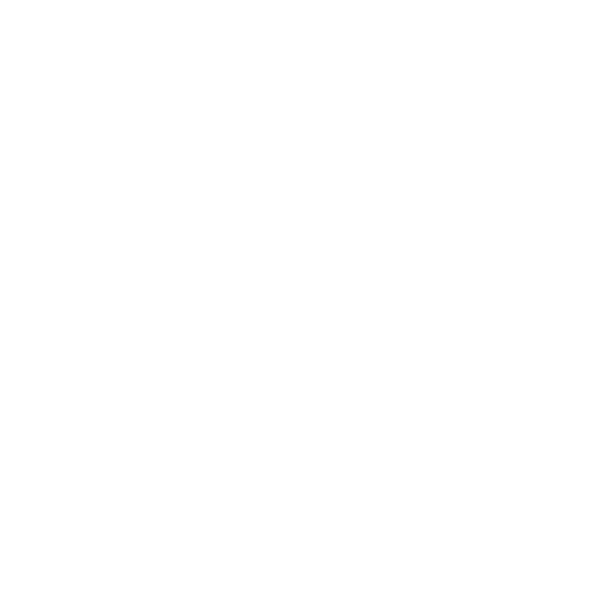

<IPython.core.display.Javascript object>


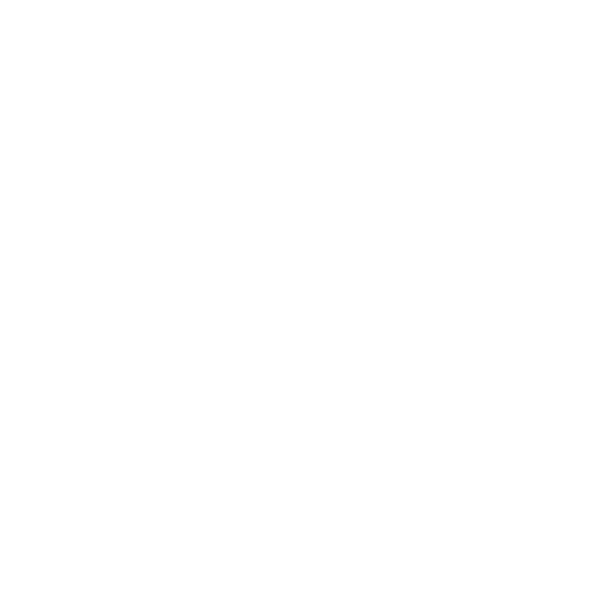

In [14]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not corrected')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

In [15]:
from ImageAnalysis3.spot_tools.matching import find_paired_centers, check_paired_centers

# matching
_new_drift, paired_ref_cts, paired_corr_cts = find_paired_centers(ref_spots[:,1:4], corr_raw_spots[:,1:4], drift=drift)
print(_new_drift)
_new_drift, paired_ref_cts, paired_corr_cts = check_paired_centers(paired_ref_cts, paired_corr_cts)
print(_new_drift)

[-0.08930235 -0.6118707   0.26924846]
[-0.00355397 -0.41068091  0.16733006]


## chromatic for 561

In [7]:
cc_folder = folders[2]
ref_folder = folders[1]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H76R24Cy3_3color \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5_3color


In [8]:
all_colors

['750', '647', '561', '488']

-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 60 images in 30 threads in 34.036s.
++ fitting polynomial orders: [1 1 1]
-- constants: [-5.66769018e-01 -8.57312883e-03 -8.70600296e-06 -2.47624137e-05] with rsquare=0.1272287393025917
-- constants: [ 2.98387178e-04 -1.52719146e-03  1.59033044e-03 -6.15654585e-06] with rsquare=0.96125384264845
-- constants: [ 1.95287704e-01 -2.64326560e-03 -1.83183893e-06  1.58991734e-03] with rsquare=0.964151236981791
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections_3color


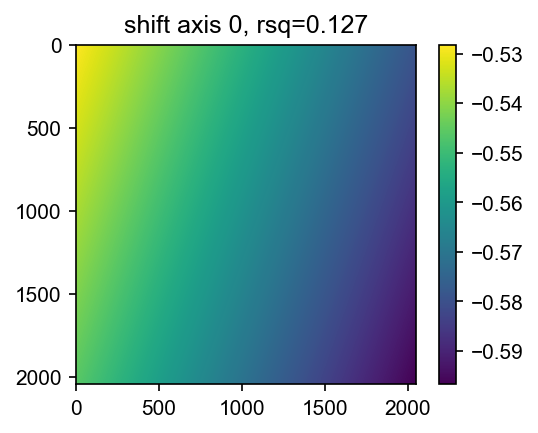

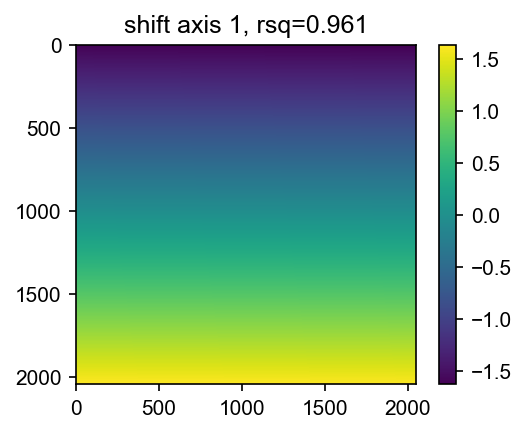

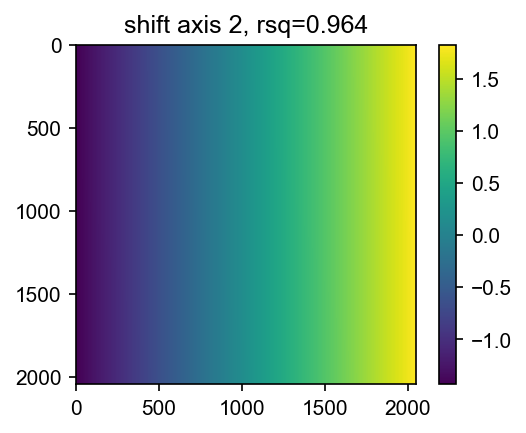

In [19]:
%matplotlib inline
reload(io_tools.load)
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '561',
                                    num_images=num_images, num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_profile=True)

### check chromatic abbrevation, 561-647

In [9]:
test_fov_id = 5
ref_filename = os.path.join(ref_folder, fovs[test_fov_id])
cc_filename = os.path.join(cc_folder, fovs[test_fov_id])

# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [561], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [561], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5_3color\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5_3color\Conv_zscan_05.dax  in 15.301s
-- removing hot pixels for channels:['647', '488'] in 28.339s
-- illumination correction for channels: 647, 488, in 4.531s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 49.785s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H76R24Cy3_3color\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_30_2048_2048_co

<IPython.core.display.Javascript object>


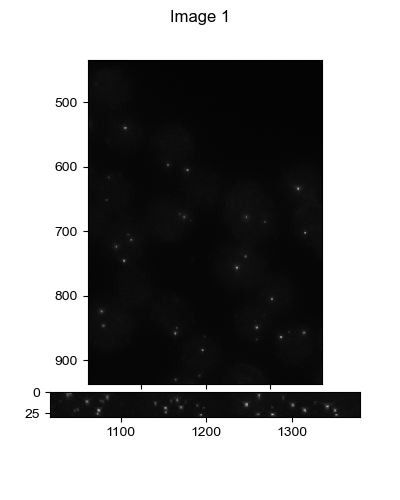

In [10]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [11]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function(_coords, _drift=array([-0.04, -2.11,  1.28]), _consts=[array([-5.66769018e-01, -8.57312883e-03, -8.70600296e-06, -2.47624137e-05]), array([ 2.98387178e-04, -1.52719146e-03,  1.59033044e-03, -6.15654585e-06]), array([ 1.95287704e-01, -2.64326560e-03, -1.83183893e-06,  1.58991734e-03])], _fitting_orders=array([1, 1, 1]), _ref_center=array([  15., 1024., 1024.]))>

In [12]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '561', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '561', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:561, 500 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:199: RuntimeWarning: overflow encountered in exp
  return 2./(1+np.exp(t_))-1.


normalize total background:445.00, 500 fitted in 52.063s.
-- start fitting spots in channel:561, 500 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:248: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


normalize total background:455.00, 500 fitted in 53.535s.
-- start fitting spots in channel:647, 500 seeded, normalize total background:515.00, 500 fitted in 52.257s.


<IPython.core.display.Javascript object>


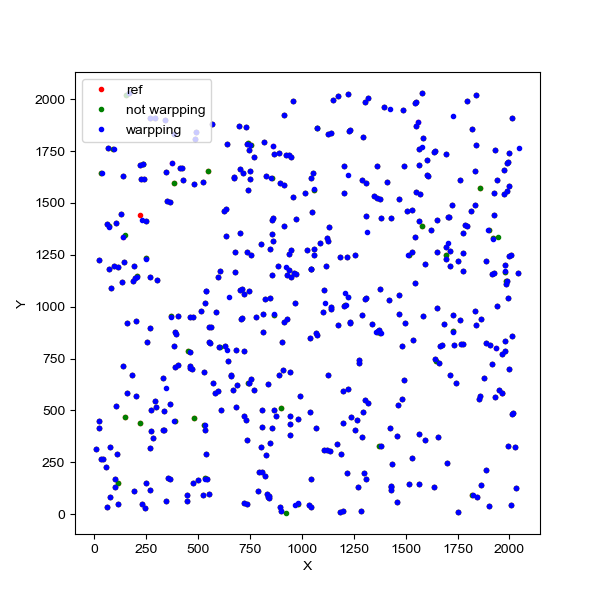

In [15]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
#plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not warpping')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

In [14]:
from ImageAnalysis3.spot_tools.matching import find_paired_centers, check_paired_centers

# matching
_new_drift, paired_ref_cts, paired_corr_cts = find_paired_centers(ref_spots[:,1:4], corr_spots[:,1:4], drift=drift)
print(_new_drift)
_new_drift, paired_ref_cts, paired_corr_cts = check_paired_centers(paired_ref_cts, paired_corr_cts+drift)
print(_new_drift)

[-0.22749987 -1.1536621   0.63221437]
[ 0.07508079  1.55682312 -0.9609845 ]


# bleedthrough correction

In [77]:
from ImageAnalysis3 import _image_size, _correction_folder, _allowed_colors
reload(correction_tools.bleedthrough)
from ImageAnalysis3.correction_tools.bleedthrough import find_bleedthrough_pairs, interploate_bleedthrough_correction_from_channel
import multiprocessing as mp
from ImageAnalysis3.correction_tools.chromatic import generate_polynomial_data


bleedthrough_channels=['750', '647', '561']

bleedthrough_correction_args = {
    'correction_folder': _correction_folder,
    'single_im_size':single_im_size,
    'all_channels':all_colors,
    'corr_channels':['750', '647', '561'],
    'bleed_corr':False,
    'illumination_corr':False,
    'chromatic_corr':False,
}

bleedthrough_fitting_args = {'max_num_seeds':1000,
    'th_seed': 500,
    'use_dynamic_th':True,
}
reload(correction_tools.bleedthrough)

<module 'ImageAnalysis3.correction_tools.bleedthrough' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\bleedthrough.py'>

+ generating bleedthrough profiles.
++ generating bleedthrough info for 60 images in 30 threads in 9.199s.
- check 3685 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.843, total: 0.843
-- iter: 2, kept in this round: 0.892, total: 0.753
-- iter: 3, kept in this round: 0.924, total: 0.696
-- iter: 4, kept in this round: 0.948, total: 0.659
-- iter: 5, kept in this round: 0.953, total: 0.629
- 2317 pairs passed.
-- 2317 spots are used to generate profiles from 750 to 647
[ 1.47760074e-01 -7.73401500e-04  7.60937982e-06  1.54877607e-05
 -8.76823539e-06  1.50350128e-07  2.22891263e-07 -4.00274440e-09
  2.32707623e-10 -8.94217643e-09] 0.05958713986951991
[ 3.44465472e+02 -1.71431275e-01  1.67067374e-01  1.83165414e-01
  1.67423351e-02  8.10828740e-06 -3.22465478e-04 -7.58042720e-05
  1.01913744e-06 -7.68815059e-05] 0.5514742272318383
-- saving bleedthrough temp profile from channel: 750 to channel: 647.


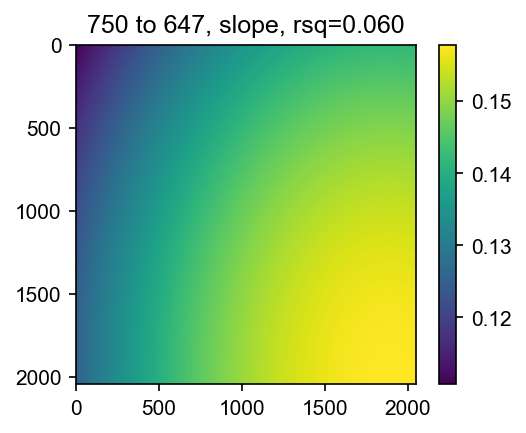

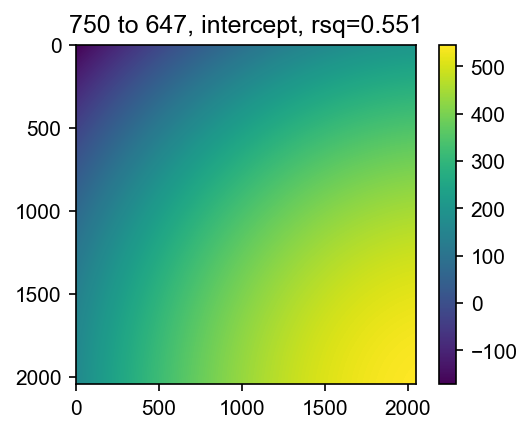

-- not enough spots (2) from 750 to 561
-- not enough spots (16) from 647 to 750
- check 17103 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.837, total: 0.837
-- iter: 2, kept in this round: 0.890, total: 0.745
-- iter: 3, kept in this round: 0.922, total: 0.688
-- iter: 4, kept in this round: 0.945, total: 0.650
-- iter: 5, kept in this round: 0.956, total: 0.621
- 10620 pairs passed.
-- 10620 spots are used to generate profiles from 647 to 561
[ 9.48171138e-02 -2.09054991e-05 -9.64772460e-06 -8.33589251e-06
  4.28734718e-07 -5.80532897e-09 -1.33450620e-08  5.47849869e-09
  9.34605733e-12  4.00834900e-09] 0.22740288107799
[ 2.70322611e+02 -1.92500940e+00  1.68440540e-01  1.84061787e-01
  5.06556303e-02  9.38302318e-05 -1.21653434e-04 -7.65850116e-05
 -7.27086058e-07 -8.11860862e-05] 0.6167625053021646
-- saving bleedthrough temp profile from channel: 647 to channel: 561.


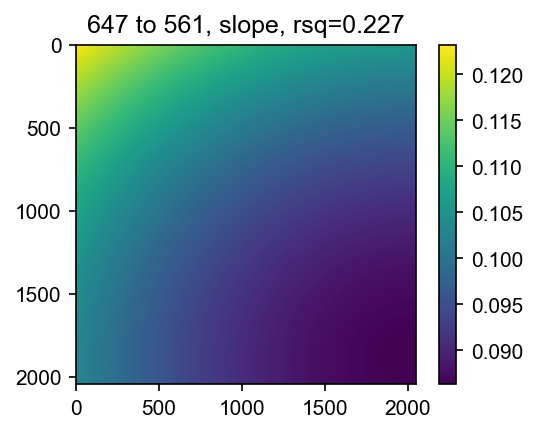

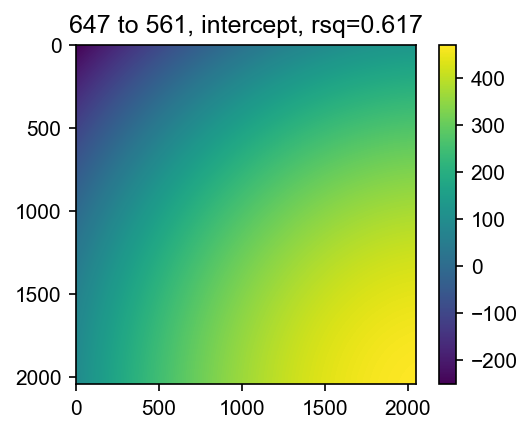

-- not enough spots (17) from 561 to 750
-- not enough spots (36) from 561 to 647
-- saving to file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections_3color\bleedthrough_correction_750_647_561_2048_2048.npy


In [97]:
# run bleedthrough correction
%matplotlib inline
reload(correction_tools.bleedthrough)
bleed_pf = correction_tools.bleedthrough.Generate_bleedthrough_correction(
            folders[0:3], rsq_th=0.8,
            corr_channels=bleedthrough_channels,
            correction_args=bleedthrough_correction_args,
            fitting_args=bleedthrough_fitting_args,
            num_images=num_images, num_threads=num_threads,
            save_folder=correction_folder,
            overwrite_profile=True,
            overwrite_temp=False,
            )

### Check bleedthorugh for cy7

In [101]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

In [102]:
folders

['\\\\10.245.74.158\\Chromatin_NAS_6\\20201012-mouse_proB_IgH++\\H74R24Cy7_3color',
 '\\\\10.245.74.158\\Chromatin_NAS_6\\20201012-mouse_proB_IgH++\\H75R24Cy5_3color',
 '\\\\10.245.74.158\\Chromatin_NAS_6\\20201012-mouse_proB_IgH++\\H76R24Cy3_3color']

In [103]:
reload(ia.io_tools.load)
cy7_filename = os.path.join(folders[0], fovs[3])

cy7_raw_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy7_corr_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, bleed_profile=bleed_pf,
                                                   chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True, hot_pixel_corr=False,
                                                   correction_folder=correction_folder,
                                                   #correction_folder=r'\\10.245.74.158\Chromatin_NAS_0\Corrections\Corrections_202008',
                                                   )

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H74R24Cy7_3color\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H74R24Cy7_3color\Conv_zscan_03.dax  in 10.480s
-- removing hot pixels for channels:['750', '647', '561'] in 36.134s
-- illumination correction for channels: 750, 647, 561, in 7.086s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 56.209s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H74R24Cy7_3color\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- 

<IPython.core.display.Javascript object>


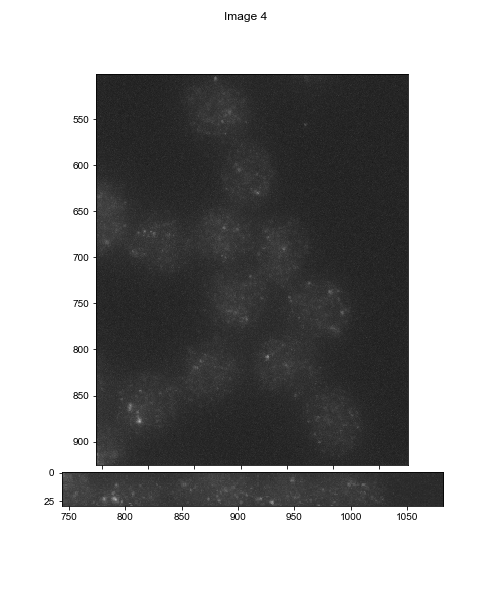

In [104]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy7_raw_ims[0], cy7_corr_ims[0], cy7_raw_ims[1], cy7_corr_ims[1]])

## Check bleedthrough for cy5

In [106]:
reload(ia.io_tools.load)
cy5_filename = os.path.join(folders[1], fovs[3])

cy5_raw_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy5_corr_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, bleed_profile=bleed_pf,
                                                   chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5_3color\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5_3color\Conv_zscan_03.dax  in 1.312s
-- removing hot pixels for channels:['750', '647', '561'] in 36.388s
-- illumination correction for channels: 750, 647, 561, in 7.137s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 46.628s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5_3color\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- l

<IPython.core.display.Javascript object>


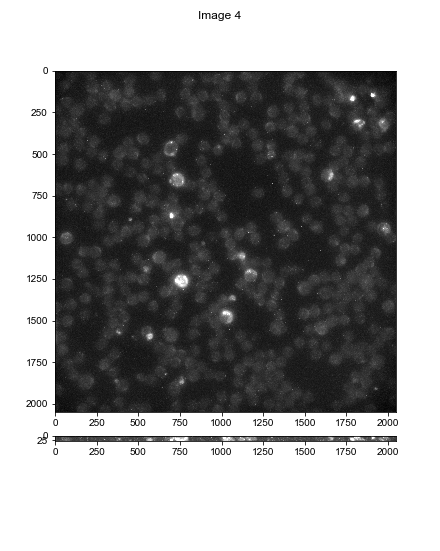

In [107]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy5_raw_ims[1], cy5_corr_ims[1], cy5_raw_ims[2], cy5_corr_ims[2]])

## Check bleedthrough for cy3

In [109]:
reload(ia.io_tools.load)
cy3_filename = os.path.join(folders[2], fovs[3])

cy3_raw_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy3_corr_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, bleed_profile=bleed_pf,
                                                   chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H76R24Cy3_3color\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H76R24Cy3_3color\Conv_zscan_03.dax  in 1.270s
-- removing hot pixels for channels:['750', '647', '561'] in 35.431s
-- illumination correction for channels: 750, 647, 561, in 7.200s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 45.706s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H76R24Cy3_3color\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- l

<IPython.core.display.Javascript object>


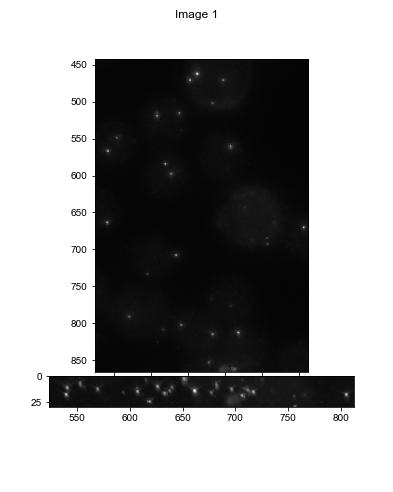

In [111]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy3_raw_ims[2], cy3_corr_ims[2], cy3_raw_ims[1], cy3_corr_ims[1]])